# 2. Implementing Gradient Descent Algorithm

Given a function $f(x) = \sqrt{x^2+5}$, $x\in \mathbf{R}$.

This function is L-smooth.

## Analytic Solution

Find the gradient of this function and the minimum value of this function analytically.

Given
$f(x) = \sqrt{x^2 +5}$

the derivative is
$f'(x) = \frac12(x^2+5)^{-1/2} \cdot 2x$

$f'(x) = \frac{x}{\sqrt{x^2 + 5}}$

Setting $f'(x)=0$ gives $x=0$

So the minimum is $f_{\min} = \sqrt{5}$ at $x = 0$.


## A. Plot Function

Plot this function over the interval $[-5,5]$

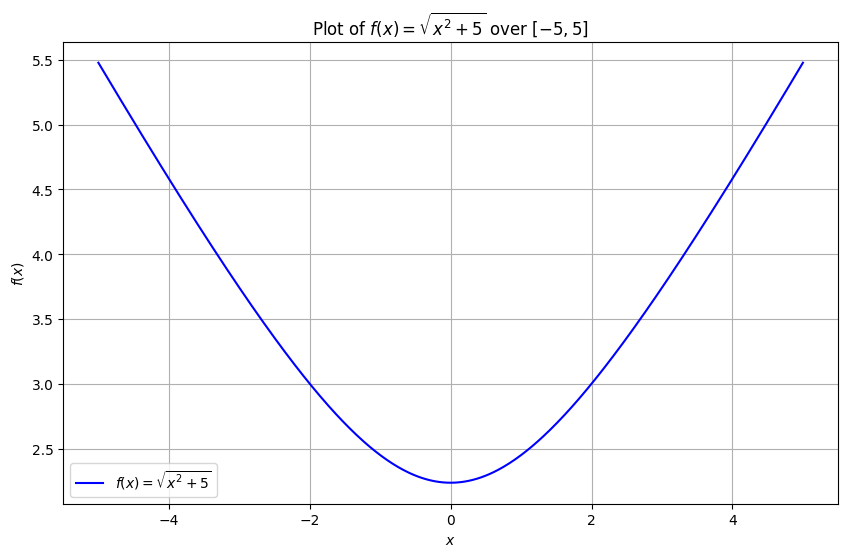

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sqrt(x**2 + 5) # function

x_values = np.linspace(-5, 5, 500) # Generate 500 points
y_values = f(x_values)

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label=r'$f(x) = \sqrt{x^2+5}$', color='blue')
plt.title(r'Plot of $f(x) = \sqrt{x^2+5}$ over $[-5, 5]$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.grid(True)
plt.legend()
plt.show()

## B. Perform the Gradient Descent algorithm

Perform the Gradient Descent algorithm to find the minimum value of $f$ for $50$ iterations ($T$) with a step size of $1$ ($\alpha$).

*Use the last digit of your SB ID divided by 5 and then plus 1 as the initial guess*

Initial guess: $\frac85+1=2.6$

In [2]:
def df(x):
  return x / (x**2 + 5)

The derivative is $f'(x) = \frac{x}{\sqrt{x^2+5}}$, so the minimum value is $f(0)=\sqrt{5}$.


In [3]:
def grad_desc(f, df, x0, step_size, num_iterations):
    """
    Perform gradient descent on a 1D function.

    Parameters:
    f : Function to minimize, f(x)
    df : Derivative of f, f'(x)
    x0 : Initial guess -- float
    step_size : Step size -- float
    tol : Tolerance -- float
        based on |x_{k+1} - x_k|
    max_iter : Maximum number of iterations -- int

    Returns
    x : Approximite minimizer -- float
    history : List of iterates x_k -- list[float]
    """

    x = x0 # initial
    history = [x0]

    for _ in range(num_iterations):
        grad = df(x)
        x_new = x - step_size * grad

        history.append(x_new)

        x = x_new

    return x, history


In [4]:
x0 = 2.6
step_size = 1
num_iterations = 50

x_min, history = grad_desc(f, df, x0, step_size, num_iterations)

print("Approximate minimizer:", x_min)
print("Function value there:", f(x_min))

Approximate minimizer: 8.763261350874759e-05
Function value there: 2.2360679792169726


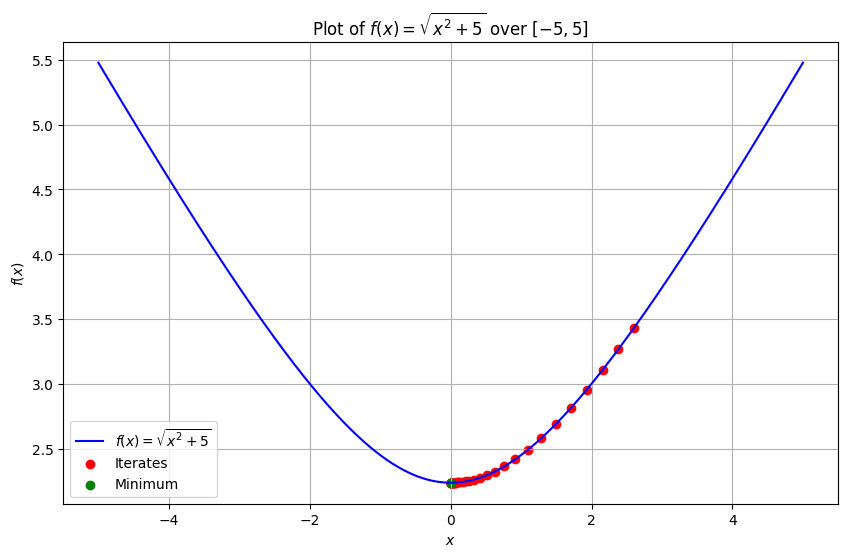

In [5]:
x_values = np.linspace(-5, 5, 500) # Generate 500 points
y_values = f(x_values)

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label=r'$f(x) = \sqrt{x^2+5}$', color='blue')
plt.scatter(history, [f(x) for x in history], color='red', label='Iterates')
plt.scatter(x_min, f(x_min), color='green', label='Minimum')

plt.title(r'Plot of $f(x) = \sqrt{x^2+5}$ over $[-5, 5]$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.grid(True)
plt.legend()
plt.show()

## C. Record the values of $x_k$

at the $k$-th iteration during GD and report $x_T$.

In [6]:
x_T = history[-1]

print("x_T:", x_T)
print("x_min:", x_min)
print("History of iterates:", history)

x_T: 8.763261350874759e-05
x_min: 8.763261350874759e-05
History of iterates: [2.6, 2.3789115646258505, 2.155732803630294, 1.932275593592408, 1.7110316724589907, 1.4952002316151196, 1.288555955065195, 1.095090020389078, 0.918440435424249, 0.7612683168436538, 0.6248287974120865, 0.5089139266555606, 0.41214371048987974, 0.3324232700671674, 0.2673762238212515, 0.21465479058459622, 0.1721158431538585, 0.13789542273552136, 0.11042082489511695, 0.08839038228967153, 0.07073988600189761, 0.056606054311912804, 0.04529209399055886, 0.03623739010886927, 0.02899181499023096, 0.023194426562556485, 0.01855604032317161, 0.014845087814493407, 0.011876201106245567, 0.00950102788585534, 0.007600856614198131, 0.0060807028561335845, 0.0048645712781870505, 0.0038916616271468902, 0.003113331659283689, 0.002490666534504892, 0.0019925338456291495, 0.001594027392932676, 0.0012752220763581142, 0.0010201777440366684, 0.0008161422376998407, 0.0006529138119047767, 0.0005223310606572139, 0.0004178648542260686, 0.000

## D. Plot function vs. iteration

Plot the value of $f(x_k)$ vs. the iteration number $k$

In [7]:
f_hist = [f(x) for x in history]

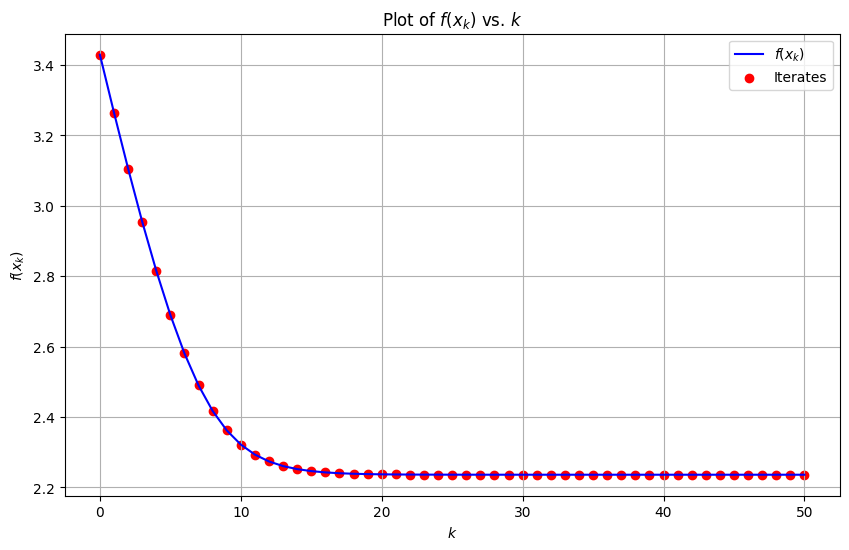

In [8]:
ks = list(range(len(f_hist)))
plt.figure(figsize=(10, 6))
plt.plot(ks, f_hist, label=r'$f(x_k)$', color='blue')
plt.scatter(ks, f_hist, color='red', label='Iterates')

plt.title(r'Plot of $f(x_k)$ vs. $k$')
plt.xlabel('$k$')
plt.ylabel('$f(x_k)$')
plt.grid(True)
plt.legend()
plt.show()

## E. Gradient descent for different step sizes

In [9]:
step_sizes = [5, 3, 1, 0.5]
histories = {}

In [10]:
for step_size in step_sizes:
    x_min, history = grad_desc(f, df, x0, step_size, num_iterations)
    histories[step_size] = history

    print(f"\nStep size α = {step_size}")
    print("First 5 iterates:", [round(xk, 4) for xk in history[:5]])
    print("Last 5 iterates: ", [round(xk, 6) for xk in history[-5:]])
    print("x_T =", round(history[-1], 6))


Step size α = 5
First 5 iterates: [2.6, 1.4946, 0.4615, 0.0189, 0.0]
Last 5 iterates:  [0.0, 0.0, 0.0, 0.0, 0.0]
x_T = 0.0

Step size α = 3
First 5 iterates: [2.6, 1.9367, 1.2728, 0.696, 0.3153]
Last 5 iterates:  [0.0, 0.0, 0.0, 0.0, 0.0]
x_T = 0.0

Step size α = 1
First 5 iterates: [2.6, 2.3789, 2.1557, 1.9323, 1.711]
Last 5 iterates:  [0.000214, 0.000171, 0.000137, 0.00011, 8.8e-05]
x_T = 8.8e-05

Step size α = 0.5
First 5 iterates: [2.6, 2.4895, 2.3783, 2.2667, 2.1549]
Last 5 iterates:  [0.043637, 0.039275, 0.035348, 0.031814, 0.028634]
x_T = 0.028634


For readability, only the first and last few iterates are displayed,
while the full sequence of $x_k$ values is stored internally.

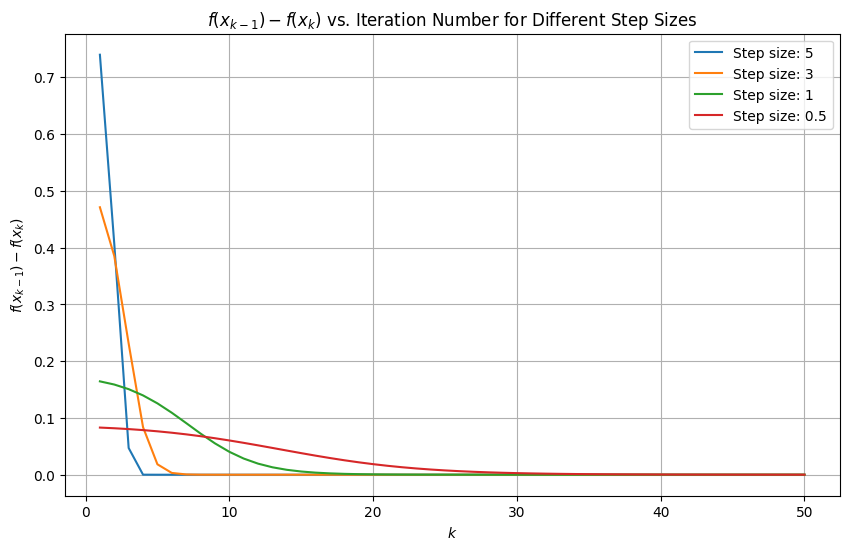

In [11]:
plt.figure(figsize=(10, 6))

for step_size in step_sizes:
  history = histories[step_size]  # stored x_k for this step_size
  f_k = [f(x) for x in history]

  # compute difference for k = 1, 2, ..., T
  deltas = [f_k[k-1] - f_k[k] for k in range(1, len(f_k))]
  ks = list(range(1, len(f_k)))   # k axis

  plt.plot(ks, deltas, label=f'Step size: {step_size}')

plt.title(r"$f(x_{k-1}) - f(x_k)$ vs. Iteration Number for Different Step Sizes")
plt.xlabel(r"$k$")
plt.ylabel(r"$f(x_{k-1}) - f(x_k)$")

plt.grid(True)
plt.legend()
plt.show()

**Observation:**

For step sizes $\alpha = 0.5, 1,$ and $3$,

$(f(x_{k-1})-f(x_k))$

remains nonnegative $(\geq0)$, so the objective decreases monotonically.

# 3. Linear Regression

with Numpy and Graphing with Matplotlib

## A. Generate Data

1. Set up seed with last two digits of ID

2. Generate `X` of shape (100, 2) with `np.random.rand(100,2)` -- uniformly distrimuted random numbers between 0 and 1, arranged as a $100\times2$ matrix

3. Genrate output $y$ to have a feature with strong influence, $4*X[:,0]$ plus a second feature of weaker influence, $0.5*X[:,1]$, plus noise, `np.random.rand(100)` -- generates normally distributed (Gaussian) random numbers with mean 0 and standard deviation 1, as a length-100 vector.

In [12]:
# Generate synthetic data
np.random.seed(8) # it's 08, but cant do leading 0
X = np.random.rand(100,2) # input
y = 4 + 4 * X[:,0] + 0.5 * X[:,1] + np.random.randn(100) # noise

# Check shapes
print(X.shape)
print(y.shape)

(100, 2)
(100,)


## B. Design Matrix & Normal Eq

Build the design matrix and solve the normal equation

At this point, the model is:

$y \approx \theta_0+\theta_1x_1+\theta_2x_2$.



1. Add column of ones (100,3)
2. Solve $\theta=(X_b^\top X_b)^{-1}X_b^\top y$

3. Print intercept and coefficients

Hopefully the coefficients are $\approx4$ and $\approx0.5$, but not exact because of noise.

In [13]:
# Add bias (intercept) term
X_b = np.c_[np.ones((100, 1)), X] # add column to shape (100, 3)

# Solve normal eq
theta_best = np.linalg.solve(X_b.T @ X_b, X_b.T @ y)

print("Intercept:", theta_best[0])
print("Coefficients:", theta_best[1:])

Intercept: 3.82536311622546
Coefficients: [4.21203232 0.58704735]


## C. Plot Regression Plane

In [14]:
from mpl_toolkits.mplot3d import Axes3D # for 3D

The goal here is to practice:

*   design matrices
*   vectorized evaluation
*   scalability

so the workflow alternates between geometric and algebraic representations:
1. 1D - define axes
2. 2D - construct surface grid
3. Vectorized - evaluate the model at many points using a design matrix
4. 2D - reshape results for surface plotting



In [15]:
# grid for regression plane
x1_grid = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
x2_grid = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)

# 2D meshgrid
X1, X2 = np.meshgrid(x1_grid, x2_grid)

# Design matrix for grid points
X_grid = np.c_[np.ones_like(X1.ravel()), X1.ravel(), X2.ravel()]

# Evaluate model on grid
y_values = X_grid @ theta_best
y_values = y_values.reshape(X1.shape)

Text(0.5, 0, 'y')

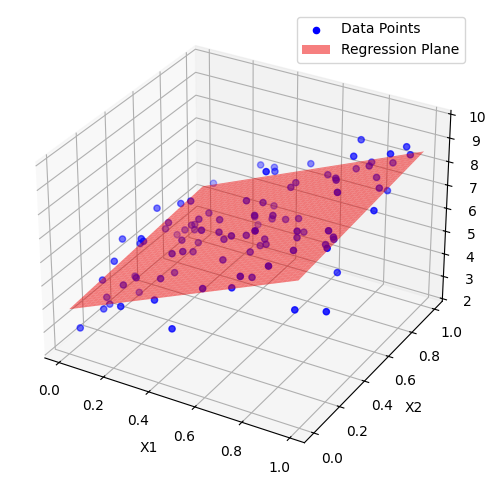

In [16]:
from matplotlib import legend

# Plot data and regression plane
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Data points
ax.scatter(X[:, 0], X[:, 1], y, color='blue', label='Data Points')
ax.plot_surface(X1, X2, y_values, color='red', alpha=0.5, label='Regression Plane')

legend = ax.legend()

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('y')

The regression plane comes from evaluating the fitted linear model on a grid of input values and visualizing the result with the data points.

In [17]:
# Reporting parameter values explicitly
print("Estimated parameters:")
print("theta_0 =", theta_best[0])
print("theta_1 =", theta_best[1])
print("theta_2 =", theta_best[2])

Estimated parameters:
theta_0 = 3.82536311622546
theta_1 = 4.212032319254285
theta_2 = 0.587047349634779


# 4. Logistic Regression

with Numpy and Graphing with Mathplotlib.

(Part 2 + Part 3, but with sigmoid and a differential loss.)

## A. Logistic Regression Model

Definition. Model setup.

- `sigmoid`
- adding bias
- prediction function
- loss function
- gradient computation
- training loop as a function

In [18]:
def sigmoid(z):
    """
    Sigmoid activation function.
    Maps real-valued inputs to (0, 1).
    """
    return 1 / (1 + np.exp(-z))


def add_bias(X):
    """
    Add a bias (intercept) column of ones to the feature matrix X.
    If X has shape (m, d), returns X_b with shape (m, d+1).
    """
    return np.c_[np.ones((X.shape[0], 1)), X]


def predict_proba(X, theta):
    """
    Predict probabilities P(y=1 | x) for each row in X.
    """
    X_b = add_bias(X)
    return sigmoid(X_b @ theta)


def predict(X, theta, threshold=0.5):
    """
    Predict class labels (0 or 1) using a probability threshold.
    """
    probs = predict_proba(X, theta)
    return (probs >= threshold).astype(int)


def cross_entropy_loss(y, y_hat, eps=1e-12):
    """
    Binary cross-entropy (log loss).
    eps prevents log(0).
    """
    y_hat = np.clip(y_hat, eps, 1 - eps)
    return -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))


def compute_gradient(X, y, theta):
    """
    Compute gradient of the cross-entropy loss with respect to theta.
    """
    X_b = add_bias(X)
    m = X_b.shape[0]
    y_hat = sigmoid(X_b @ theta)
    grad = (X_b.T @ (y_hat - y)) / m
    return grad


In [19]:
def train_logreg_gd(X, y, learning_rate, num_epochs, theta0=None):
  """
  Train logistic regression using gradient descent.
  Returns learned parameters and loss history.
  """
  X_b = add_bias(X)
  n_params = X_b.shape[1]

  # Initialize parameters
  if theta0 is None:
      theta = np.zeros(n_params)
  else:
      theta = theta0.copy()

  losses = []

  for _ in range(num_epochs):
      # Forward pass
      y_hat = sigmoid(X_b @ theta)

      # Compute loss
      loss = cross_entropy_loss(y, y_hat)
      losses.append(loss)

      # Compute gradient
      grad = (X_b.T @ (y_hat - y)) / X_b.shape[0]

      # Gradient descent update
      theta -= learning_rate * grad

  return theta, losses

## B. Dataset Generation

and visualization

- generating `X_train`, `y_train`, `X_test`, `y_test`
- scatter plot

In [20]:
# Reproducibility for Part 4
np.random.seed(8) #SBID

# Generate 2D binary class dataset
m_train = 200
m_test = 100

X0_train = np.random.randn(m_train // 2, 2) + np.array([0, 0])
X1_train = np.random.randn(m_train // 2, 2) + np.array([2, 2])
X_train = np.vstack([X0_train, X1_train])
y_train = np.hstack([np.zeros(m_train // 2), np.ones(m_train // 2)])

X_0_test = np.random.randn(m_test // 2, 2) + np.array([0, 0])
X_1_test = np.random.randn(m_test // 2, 2) + np.array([2, 2])
X_test = np.vstack([X_0_test, X_1_test])
y_test = np.hstack([np.zeros(m_test // 2), np.ones(m_test // 2)])

print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_test:", X_test.shape, "y_test:", y_test.shape)

X_train: (200, 2) y_train: (200,)
X_test: (100, 2) y_test: (100,)


The training data consists of two classes:  
- Class 0 corresponds to points generated near the origin
- Class 1 corresponds to points generated near a shifted mean

resulting in two overlapping but approximately linearly separable clusters.

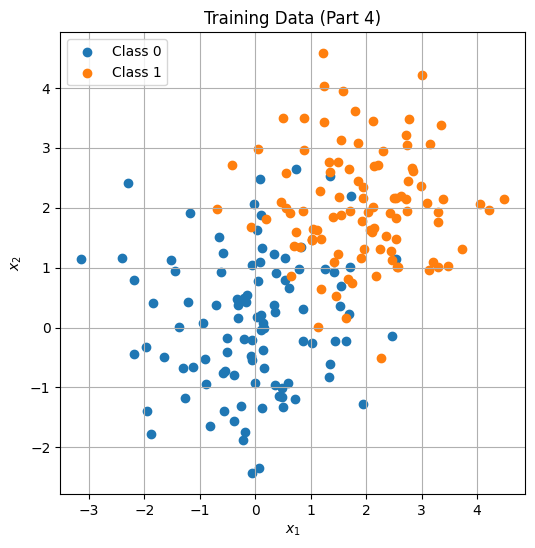

In [21]:
plt.figure(figsize=(6, 6))
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], label="Class 0")
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], label="Class 1")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Training Data (Part 4)")
plt.legend()
plt.grid(True)
plt.show()

Class 0 corresponds to points generated near (0,0) and labeled y=0, while Class 1 corresponds to points generated near (2,2) and labeled y=1.

## C. Tune

the learning rate and number of epochs:

- fine-tune the values for the `learning_rate` and `num_epochs` parameters
- Identify suitable values to enable convergence. $\theta$ closely approximating the optimal parameter values $\theta^*$

*and report accuracy*

In [22]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

def evaluate_model(theta):
    train_acc = accuracy(y_train, predict(X_train, theta))
    test_acc = accuracy(y_test, predict(X_test, theta))
    return train_acc, test_acc

Each item in the list of 'candidates' is tuple containing two values
1. the learning rate
2. number of epochs

Machine learning: epochs
- refer to one complete pass throufh the entire training dataset during the training process of a model
- Training with a certain number of epochs means the optimization algorithm has seen and processed all the training examples **that many times**
- more epochs- can lead to *better-trained model*, too many- can lead to *overfitting*

In [23]:
candidates = [
    (0.5, 200),
    (0.1, 200),
    (0.05, 500),
    (0.01, 1000),
    (0.005, 2000),
]

results = []

Hyperparameter Tuning Strategy

To identify suitable values for the learning rate and number of epochs, we
- train the logistic regression model using several candidate hyperparameter pairs
- record the final cross-entropy loss along with training and testing accuracy *for each combination*

This allows us to assess convergence behavior and generalization performance and select hyperparameters that yield stable training and high accuracy.

In [24]:
for lr, epochs in candidates:

  # Start Training
  theta, losses = train_logreg_gd(
      X_train, y_train,
      learning_rate=lr,
      num_epochs=epochs
  )

  # Calculate training and testing accuracy
  train_acc, test_acc = evaluate_model(theta)

  # Store & Report results
  results.append((lr, epochs, losses[-1], train_acc, test_acc))
  print(
      f"lr={lr:<6} epochs={epochs:<5}"
      f"final_loss={losses[-1]:.4f}"
      f"train_acc={train_acc:.3f}"
      f"test_acc={test_acc:.3f}")

lr=0.5    epochs=200  final_loss=0.2345train_acc=0.895test_acc=0.920
lr=0.1    epochs=200  final_loss=0.2773train_acc=0.895test_acc=0.890
lr=0.05   epochs=500  final_loss=0.2667train_acc=0.900test_acc=0.910
lr=0.01   epochs=1000 final_loss=0.3207train_acc=0.885test_acc=0.900
lr=0.005  epochs=2000 final_loss=0.3207train_acc=0.885test_acc=0.900


## D. Decision Boundary Plot

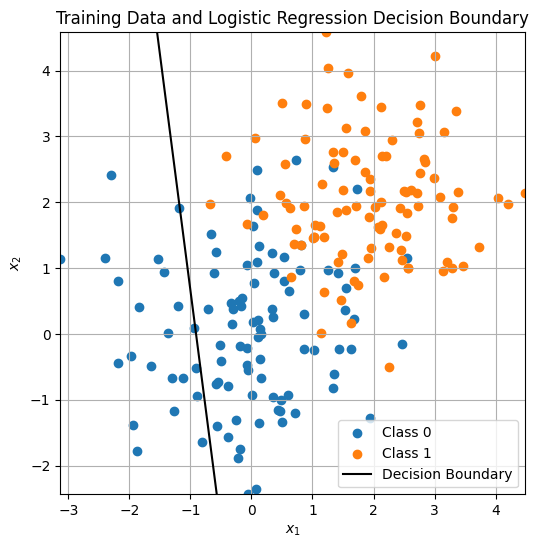

In [27]:
plt.figure(figsize=(6, 6))

# Plot training data
plt.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], label="Class 0")
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], label="Class 1")

# Decision boundary: theta0 + theta1*x1 + theta2*x2 = 0
theta0, theta1, theta2 = theta_best
x1_vals = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 200)
x2_vals = -(theta0 + theta1 * x1_vals) / theta2

plt.plot(x1_vals, x2_vals, color="black", label="Decision Boundary")

# Limit view to data range
plt.xlim(X_train[:, 0].min(), X_train[:, 0].max())
plt.ylim(X_train[:, 1].min(), X_train[:, 1].max())

plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Training Data and Logistic Regression Decision Boundary")
plt.legend()
plt.grid(True)
plt.show()

The learned decision boundary corresponds to the set of points where the predicted class probability is 0.5. Its placement between the two clusters demonstrates "effective" binary classification on the training data.